# MUSE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

% matplotlib inline

### Main Table

In [2]:
hdul = fits.open('MW_1-24_main_table.fits')
hdul.info()

Filename: MW_1-24_main_table.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     39   831R x 14C   [21A, D, D, D, D, 5A, D, 5A, I, 60A, 5A, D, 5A, D]   


In [3]:
data = hdul[1].data
hdul.close()

In [4]:
data.columns

ColDefs(
    name = 'UNIQUE_ID'; format = '21A'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'Z'; format = 'D'
    name = 'Z_ERR'; format = 'D'
    name = 'LEAD_LINE'; format = '5A'
    name = 'SN'; format = 'D'
    name = 'QUALITY'; format = '5A'
    name = 'CONFIDENCE'; format = 'I'
    name = 'OTHER_LINES'; format = '60A'
    name = 'Guo_ID'; format = '5A'
    name = 'Guo_sep'; format = 'D'
    name = 'Skelton_ID'; format = '5A'
    name = 'Skelton_sep'; format = 'D'
)

In [5]:
# filter by high quality = a

q = 'a'

data = data[data['QUALITY'] == q]

print(data.size)

288


In [6]:
# filter by lead line and other lines = lya

lya = 'Lya'
lya_ids = []
lya_zs = []

for d in data:
    lead = d['LEAD_LINE']
    others = d['OTHER_LINES']
    if ((lya == lead) or (lya in others)):
        lya_ids.append(d['UNIQUE_ID'])
        lya_zs.append(d['Z'])

In [7]:
lya_ids

['104014050', '115003085']

### Emline Table

In [8]:
hdul = fits.open('MW_1-24_emline_table.fits')
hdul.info()

Filename: MW_1-24_emline_table.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     81   1652R x 27C   [10A, I, I, I, 5A, 27A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L]   


In [9]:
data = hdul[1].data
hdul.close()

In [10]:
data.columns

ColDefs(
    name = 'UNIQUE_ID'; format = '10A'
    name = 'POINTING_ID'; format = 'I'
    name = 'OBJ_ID'; format = 'I'
    name = 'RID'; format = 'I'
    name = 'IDENT'; format = '5A'
    name = 'COMMENT'; format = '27A'
    name = 'SN'; format = 'D'
    name = 'RA_SN'; format = 'D'; unit = 'deg'
    name = 'DEC_SN'; format = 'D'; unit = 'deg'
    name = 'LAMBDA_SN'; format = 'D'; unit = 'Angstrom'
    name = 'RA_PEAK_SN'; format = 'D'; unit = 'deg'
    name = 'DEC_PEAK_SN'; format = 'D'; unit = 'deg'
    name = 'LAMBDA_PEAK_SN'; format = 'D'; unit = 'Angstrom'
    name = 'LAMBDA_NB_MIN'; format = 'D'; unit = 'Angstrom'
    name = 'LAMBDA_NB_MAX'; format = 'D'; unit = 'Angstrom'
    name = 'RA_1MOM'; format = 'D'; unit = 'deg'
    name = 'DEC_1MOM'; format = 'D'; unit = 'deg'
    name = 'R_KRON'; format = 'D'; unit = 'arcsec'
    name = 'F_KRON'; format = 'D'; unit = 'cm-2 erg s-1'
    name = 'F_2KRON'; format = 'D'; unit = 'cm-2 erg s-1'
    name = 'F_3KRON'; format = 'D'; unit = 'c

In [11]:
# Filter by previous uids

lya_peak, lya_min, lya_max = [], [], []

for d in data:
    if ((d['UNIQUE_ID'] in lya_ids) and (lya == d['IDENT'])):
        lya_peak.append(d['LAMBDA_PEAK_SN']*10) # angstroms to nm
        lya_min.append(d['LAMBDA_NB_MIN']*10) # angstroms to nm
        lya_max.append(d['LAMBDA_NB_MAX']*10) # angstroms to nm

In [12]:
print(lya_ids)
print(lya_zs)
print(lya_peak)
print(lya_min)
print(lya_max)

['104014050', '115003085']
[3.66090989112854, 3.709820032119751]
[56649.1650390625, 57222.2900390625]
[56530.4150390625, 57066.0400390625]
[56830.4150390625, 57378.5400390625]


### Spectra

In [13]:
lya_xs, lya_ys = [], []

for i in range(len(lya_ids)):
    fn = 'spectrum_' + str(lya_ids[i]) + '.fits'
    hdul = fits.open(fn)
    data = hdul[1].data
    hdul.close()
    
    x = data['WAVE_VAC']*10 # angstroms to nm
    y = data['FLUX']
    z = lya_zs[i]
    
    x = (x-lya_peak[i])/(1+z) 
    lya_min[i] = (lya_min[i]-lya_peak[i])/(1+z)
    lya_max[i] = (lya_max[i]-lya_peak[i])/(1+z)
    lya_peak[i] = 0
    
    lya_xs.append(x)
    lya_ys.append(y)

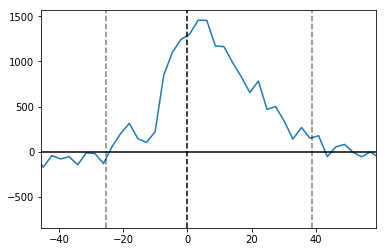

In [15]:
plt.plot(lya_xs[0], lya_ys[0])
plt.xlim(lya_min[0]-20, lya_max[0]+20)
plt.axvline(lya_peak[0], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[0], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[0], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

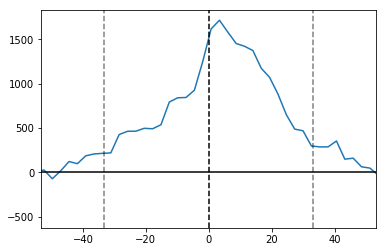

In [16]:
plt.plot(lya_xs[1], lya_ys[1])
plt.xlim(lya_min[1]-20, lya_max[1]+20)
plt.axvline(lya_peak[1], 0, 1, linestyle='--',  color='k')
plt.axvline(lya_min[1], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axvline(lya_max[1], 0, 1, linestyle='--',  color='k', alpha=0.5)
plt.axhline(0, 0, 1, linestyle='-',  color='k')

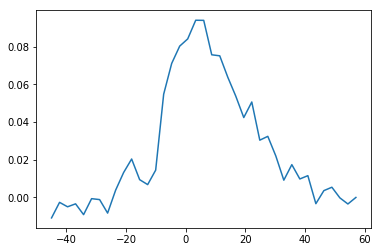

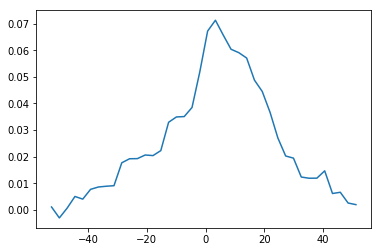

In [17]:
for i in range(len(lya_ids)):
    x = lya_xs[i]
    y = lya_ys[i]
    
    inds_sub = np.where((x>=lya_min[i]-20) & (x<=lya_max[i]+20))
    
    x_sub = x[inds_sub]
    y_sub = y[inds_sub]
    
    y_sub = y_sub/np.sum(y_sub)
    
    sub = np.array([x_sub, y_sub]).T
    
    plt.plot(x_sub, y_sub)
    plt.show()
    
    fn = 'muse_lya_' + str(lya_ids[i]) + '.txt'
    np.savetxt(fn, sub)